<div style="border:solid green 1px; padding: 20px">

<b>Привет, Анна! 🙂</b>
    
Меня зовут Никитюк Миша, я буду проверять твою работу. Предлагаю сразу перейти на <b>«ты»</b>, однако если удобнее будет на <b>«вы»</b>, то напиши об этом в комментариях в ответной итерации. 
    
Пожалуйста, не удаляй мои комментарии, они будут полезны для нашей работы при повторной проверке проекта.
    
Для более наглядного представления и лучшего понимания моих комментариев, я буду выделять их соответствующим цветом:
    
<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта.
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
</div>

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    Так я выделяю все остальные комментарии. (В основном правильные)
</div>

Предлагаю работать над проектом в диалоге: если ты вносишь изменения в свой код после моих рекомендаций, указывай это в комментариях любым выбранным цветом (пример оформления markdown ячейки можешь взять у меня). 
<br>Например вот так:

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Текст
</div>

    
</div>

# Описание проекта

В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры, из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Спасибо за вводную часть. Это очень важно, так как человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела)
    
Можно также добавить план работы 😉
</div>

## Изучение данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math as mt
from scipy import stats as st

from pymystem3 import Mystem

In [2]:
# Загрузим исходный датафрейм
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Описание исходных данных:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<b>Предварительные наблюдения</b>

* Необходимо названия столбцов привести к нижнему регистру
* Значения в Year_of_Release явно должны быть целочисленными
* Уже заметны пропущенные данные

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Окей, таблицу открыли, можем переходить к ее изучению и обработке. 
</div>

Изучим подробнее, с какой датасетом данных имеем дело в части объема уникальных значений и типов данных.

 ### Уникальные значения

In [4]:
# Количество игр
len(games['Name'].unique())

11560

In [5]:
# Количество платформ
len(games['Platform'].unique())

31

In [6]:
# Количество жанров
len(games['Genre'].unique())

13

In [7]:
# Классификация рейтинга ESRB
len(games['Rating'].sort_values().unique())

9

В нашем анализе 11560 игр на 31 платформах в 13 жанрах и с 9 вариантами рейтинга по ESRB

### Содержание колонок

In [8]:
# Виды платформ
games['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [9]:
# Годы выпуска
games['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [10]:
# Жанры игр
games['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [11]:
# Вариации рейтинга ESRB
games['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Подтверждаются пропущенные значения в колонках года выпуска, жанров и рейтинга ESRB. 

Дополнительно проверим данные оценок критиков и пользователей на возможность целочисленного формата. 
При этом данные продаж, думаю, можно оставить в формате с плавающей точкой (в млн. долларов).

In [12]:
# Оценки критиков
games['Critic_Score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Оценки критиков похожи на целочисленные, так что имеет смысл привести к типу данных <integer>. Есть пропущенные значения.

In [13]:
# Оценки пользователей
games['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Десятичная часть оценки пользователя имеет значение, поэтому потребуется перевод типа данных из <i>object</i> во <i>float</i>. 

Помимо пропущенных значений также появился формат <i>tbd</i>. Вероятно, это оценка в стадии регистрации (<i>to be decided</i> или <i>to be determined</i>). Можно воспользоваться таким форматом и привести к нему пропущенные значения на стадии обработки пропусков.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Супер, данные изучили. 
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Кстати, обрати внимание: большая часть этого блока состоит из повторяющегося кода. В случае, если действия начинают повторяться больше двух раз, стоит задуматься о введении:
    
* Цикла
* Функции
* Функции с циклом
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Миша, спасибо за рекомендацию. Постараюсь принять в практику оптимизацию повторяющихся процессов.
</div>

## Подготовка данных

### Приведение названий столбцов к нижнему регистру

In [14]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Хорошо, теперь данные записаны согласно "змеиному языку" :)
</div>

### Обработка пропусков

Чтобы иметь возможность привести данные к нужному типу, для начала обработаем пропущенные значения.

In [15]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Итак, приступим к обработке пропусков в следующих столбцах:

* name (название игры)
* year_of_release (год выпуска)
* genre (жанр игры)
* critic_score (оценка критиков)
* user_score (оценка пользователей)
* rating (рейтинг от организации ESRB)

#### Пропуски в названиях игр

In [16]:
games.loc[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Кстати, лайфхак: необязательно прописывать условие `== True` - питон автоматически поймет, если не прописано что-то иное 😉
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Окей, постараюсь обходиться без лишних деталей, где это будет возможно.
</div>

Названия пропущены только в двух играх - это ничтожная доля в общем объеме значений. К сожалению, у нас нет возможности восстановить названия этих игр, при этом целью исследования является определение названий перспективных игр. С учетом этих факторов целесообразным будет удалить эти строки.

In [17]:
games.dropna(subset = ['name'], inplace = True)

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Здесь все верно! Данных слишком мало - можем удалить.
</div>

#### Пропуски по году выпуска

In [18]:
games.loc[games['year_of_release'].isna() == True].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Любопытно, что иногда год выпуска может быть "зашит" в самом названии игры в последних 4 числовых символах.
Попробуем подключить лемматизацию, чтобы извлечь эти данные и заменить ими пропущенные значения года выпуска в строке.

При таком подходе возможны очевидные неточности с домысливанием года выпуска, однако в целях ускорения восстановления данных и снижения трудозатрат для нашего исследования такие неточности считаю незначительными.

In [19]:
years = pd.Series(games.loc[games['year_of_release'].isna() != True, 'year_of_release']
         .astype('int').sort_values().unique(), name='years').astype('str')

In [20]:
m = Mystem()
name_lem = []
for i in games['name']:
    result = ''.join(m.lemmatize(i)).strip()[-4:]
    name_lem.append(result)
games['name_lem'] = name_lem

In [21]:
games.loc[(games['year_of_release'].isna()==True) & (games['name_lem'].isin(years) == True), 'year_of_release'] = (games.loc[(games['year_of_release'].isna()==True) & (games['name_lem'].isin(years) == True), 'name_lem'])
games.drop('name_lem', axis='columns', inplace=True)

In [22]:
# Проверим результат восстановления на первых 10 строках пропущенных значений года выпуска
games.loc[games['year_of_release'].isna() == True].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.0,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.0,0.23,81.0,5.2,M
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.0,0.10,NaN,NaN,NaN


<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Анна, молодец! Очень интересное замечание и реализация получения года для пропусков!
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
К слову, некоторые игры могут содержать год в названии. Как правило, это спортивные игры с годом окончания сезона (например, **FIFA 2021** и тд). В большинстве случаев надо вычесть единицу. 
    
Но твое решение тоже подходит!
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Миша, спасибо за изящный лайфхак!
</div>

In [23]:
# Итого осталось пропущенных годов выпуска
games['year_of_release'].isna().mean()

0.015197750254293065

Осталось около 1.5% пропущенных значений в годе выпуска. Как ни обидно, придется ими пренебречь и удалить для дальнейших манипуляций с данными.

In [24]:
# Удаление строк с пропущенными данными года выпуска
games.drop(games.loc[(games['year_of_release'].isnull())].index, inplace=True)

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Данных вновь мало, поэтому действительно их можно убрать.
    
Кстати, весьма здорово, что ты применяешь разные методы удаления 👍
</div>

#### Пропуски по жанру игр

In [25]:
games['genre'].isna().mean()

0.0

Видимо, пропущенные значение по жанрам игр уже были исключены ранее.

#### Пропуски по оценкам критиков и пользователей

In [26]:
games['critic_score'].isna().mean()

0.514308281183547

In [27]:
games['user_score'].isna().mean()

0.4015432286287138

Доля пропущенных значений среди оценок критиков и пользователей существенная. Удалить такие строки мы не можем, а восстановить такое количество пропусков достаточно проблематично. Попробуем найти какую-то систематическую связь в пропущенных значениях: по какому признаку мы могли бы восстановить хоть что-то. 

Рассмотрим отсутствие оценок критиков и пользователей по годам выхода игры. 

Для начала приведем данные к нужному типу, где это возможно: год выпуска к целочисленному типу, а оценки пользователей к типу float с заменой пропусков на метку tbd

In [28]:
# Год выхода: приведение к целочисленному типу
games['year_of_release'] = games['year_of_release'].astype('int')

In [29]:
# Для приведения пользовательских оценок к типу float сначала заполним пропуски пометкой tbd
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

In [30]:
# Сводная таблица с пропущенными оценками критиков по годам
no_critic_score_by_year = (games
                          .loc[games['critic_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )

In [31]:
# Сводная таблица с пропущенными оценками пользователей по годам
no_user_score_by_year = (games
                          .loc[games['user_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Я бы рекомендовал выводить новые таблицы, чтобы можно было представлять, что получилось на выходе 😉
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Да, впопыхах не всегда доводишь дело до конца. Сейчас довыведу для наглядности.
</div>


<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v2:</b> 
    
Супер, теперь мы хотя бы имеем представление, с чем имеем дело :)
</div>

In [32]:
no_critic_score_by_year.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


In [33]:
no_user_score_by_year.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


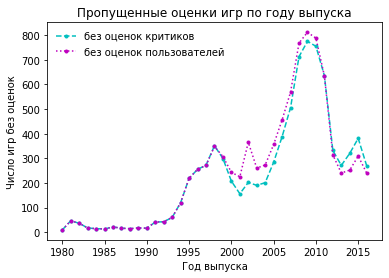

In [34]:
# Сводный график пропущенных значений оценок игр по году их выхода
fig, ax = plt.subplots()
ax.set(title='Пропущенные оценки игр по году выпуска',
       xlabel='Год выпуска', ylabel='Число игр без оценок')
ax.plot(no_critic_score_by_year['year_of_release'], no_critic_score_by_year['name'], '.--c', label='без оценок критиков')
ax.plot(no_user_score_by_year['year_of_release'], no_user_score_by_year['name'], '.:m', label='без оценок пользователей')
ax.grid=True
ax.legend(frameon=False)
plt.show()

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b> 
    
Анна, хороший график, информирующий нас о количестве продаж игр без оценок, однако как это может помочь при обработке пропусков?
    
Также не забывай, что графики стоит комментировать, потому что одного лишь рисунка может быть недостаточно :(
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> На сводных таблицах и графике прослеживается общая динамика отсутствия оценок пользователей и критиков, но осознать причины до конца не удалось. Вероятно, пропущенные значения могли быть связаны либо с техническими проблемами сбора данных, либо с взрывным ростом числа игр, когда не все игры получали оценку. Этот вопрос я не дожала, но из-за большого числа пропусков пришлось оставить и пропущенные значения, и сам вопрос без ответа.
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера v2:</b> 
    
Хорошо, я понял тебя. Просто оставлять один лишь график все же не стоит, важно дать комментарий хотя бы какой-нибудь. 
    
Пропуски действительно трудно восстановить, поэтому можно написать, что ты ничего не стала с ними делать. 
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
    <br> Вывод: в силу большого числа пропущенных значений и невозможности их корректного восстановления принято решение оставить пропущенные значения как есть.
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера v2:</b> 
    
Но как вариант, я бы мог посоветовать сгруппировать таблицу по жанру, платформе и ряду других признаков, которые ты считаешь важными при определении выводов, а затем выделить моду по каждому году, которой можно заполнить пропуски. 
</div>

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v3:</b> 
    
Да, супер, все чудесно!
</div>

#### Пропуски в значениях рейтинга ESRB

In [35]:
games['rating'].isna().mean()

0.4059177349778237

Снова значительная доля пропущенных значений, которые нет возможности удалить в силу потери большого массива данных. Попробуем нащупать характеристики, почему данные могли быть пропущены. Построим график пропущенных значений в зависимости от года выпуска игры.

In [36]:
# Сводная таблица с пропущенными значениями рейтинга ESRB по году выхода игры
no_rating_by_year = (games
                        .loc[games['rating'].isna()==True]
                        .pivot_table(index='year_of_release', values='name', aggfunc='count')
                        .reset_index()
                     )

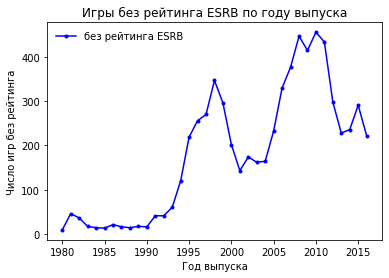

In [37]:
# График пропущенных значений рейтинга ESRB по году выхода игры
fig, ax = plt.subplots()
ax.set(title='Игры без рейтинга ESRB по году выпуска',
       xlabel='Год выпуска', ylabel='Число игр без рейтинга')
ax.plot(no_rating_by_year['year_of_release'], no_rating_by_year['name'], '.-b', label='без рейтинга ESRB')
ax.grid=True
ax.legend(frameon=False)
plt.show()

Наблюдается похожая динамика пропущенных значений по годам. Видимо, и причины пропущенных данных могут быть схожими.

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b> 
    
И вновь здесь один лишь график не отвечает на вопрос, что же в итоге делать с пропусками.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Тут опять-таки была неудачная попытка понять причину/источник пропусков. Судя по тому, что и оценки пользователей/критиков, и рейтинг ESRB пропущен по годам по одному и тому же паттерну, закрадывается подозрение, что сама рейтинговая система еще не была настолько нацелена на сбор данных в те времена, с провалами в одни и те же периоды.
</div>

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v2:</b> 
    
Кстати, весьма дельное предположение, молодец!
</div>

In [38]:
# Проверим заполнение пропусков там, где это было возможно
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8987
rating             6681
dtype: int64

#### Проверка на дубликаты

In [39]:
games.duplicated().sum()

0

Дубликаты отсутствуют.

### Суммарные продажи во всех регионах

Добавим отдельный столбец total_sales, в котором просуммируем продажи в регионах na_sales, eu_sales, jp_sales, other_sales

In [40]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Супер, общая выручка найдена верно!
</div>

<b>Промежуточный вывод</b>

При подготовке данных:
* названия столбцов приведены к нижнему регистру
* проведена замена типа данных там, где это возможно и необходимо
* обработаны пропуски
* в отдельный столбец внесены суммарные продажи по разным регионам.

Из любопытных наблюдений:
* количество неоцененных игр критиками, пользователями и рейтингом ESRB росло практически одновременно по всем платформам с 2005 года. Вероятная причина: взрывной рост производства игровой индустрии, на весь ассортимент которой уже не хватает внимания критиков
* в пропущенных данных появился фактор tbd, когда предположительно игра еще находится на оценке специалистов

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Молодец! Отличный и полный промежуточный вывод, прописаны результаты проведенных шагов, даны причины появления пропусков.
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Не забудь также про мои комментарии относительно работы с пропусками в колонках с оценками.
</div>

## Исследовательский анализ данных

### Число выпущенных игр в разные годы

In [41]:
# games_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b> 
    
Анна, обрати внимание: count выдает число строк, а не число уникальных игр. Одна игра может выйти на нескольких консолях, count должен посчитать все. Поэтому тут предпочтительнее взять число уникальных имен.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Да, прокол. Спасибо за меткое замечание. Буду исправлять.
</div>

In [42]:
games_year = games.pivot_table(index='year_of_release', values='name', aggfunc=lambda name: len(name.unique())).reset_index()

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v2:</b> 
    
Отлично, интересный способ подсчета числа выпущенных игр в разные годы)
</div>

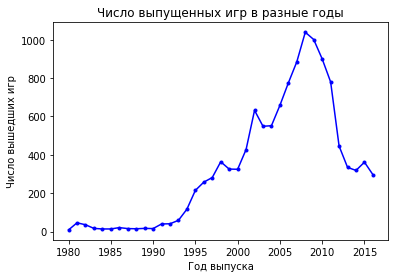

In [43]:
fig, ax = plt.subplots()
ax.set(title='Число выпущенных игр в разные годы',
       xlabel='Год выпуска', ylabel='Число вышедших игр')
ax.plot(games_year['year_of_release'], games_year['name'], '.-b')
ax.grid=True
plt.show()

До 1994 года наблюдается длинный хвост данных, которые не выглядят как репрезентативные и чуть превышают нулевую планку. Вероятно, ими в нашем исследовании можно пренебречь.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Окей, график построен правильно, и временной промежуток выбран подходящий.
</div>

### Динамика продаж по платформам

In [44]:
# TOP10 платформ с наибольшими суммарными продажами
platform_popular = (games
                        .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='total_sales', ascending=False)
                        .head(10)
                        .reset_index(drop=True)
                   )
platform_popular

,platform,total_sales
0,PS2,1247.28
1,X360,961.30
2,PS3,931.34
3,Wii,891.18
4,DS,802.79
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.54
9,3DS,257.81


In [45]:
# Список популярных платформ из TOP10
platforms = platform_popular['platform']

Рассмотрим распределение суммарных продаж по годам для каждой из популярных платформ.

In [46]:
platform_year = (games
                      .loc[games['platform'].isin(platforms)]
                      .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                      .reset_index()
                 )

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


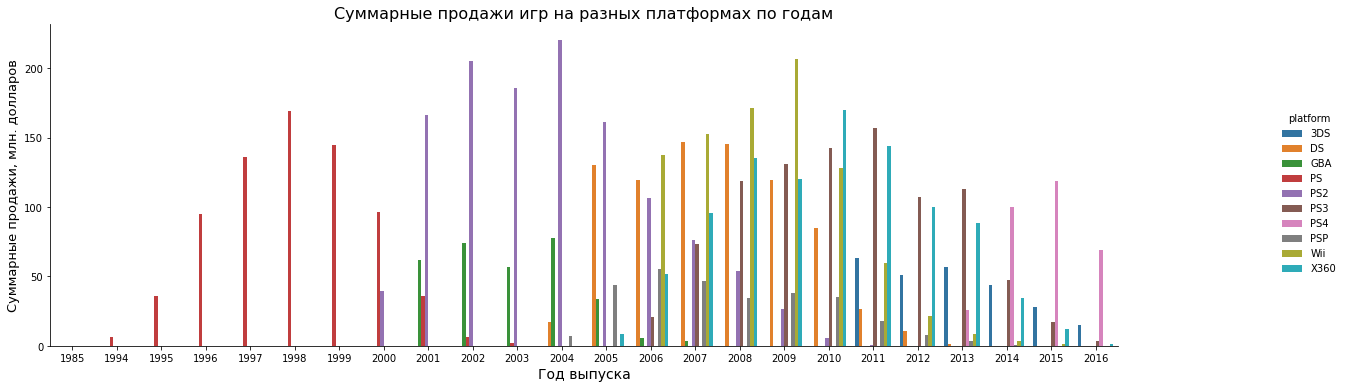

In [47]:
plot = sns.catplot("year_of_release", "total_sales", hue="platform", kind="bar", data=platform_year)
plt.title("Суммарные продажи игр на разных платформах по годам", fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Суммарные продажи, млн. долларов', fontsize=13)
plot.fig.set_size_inches(20,5)
plt.show()

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Лайфхак: ошибки можно отключать с помощью записи вот такой функции в самом начале работы
</div>

In [48]:
# код ревьюера
# import warnings
# Warnings.filterwarnings('ignore')

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Спасибо за подсказку. Возьми на заметку на будущее.
</div>

<b>Выводы</b>

С эволюцией платформ лидеры продаж с годами менялись. По сумме продаж явным лидером в начале 2000-х была Playstation 2, в середине 2000-х в лидеры вырвалась Wii, на исходе десятилетия популярность набрала Xbox360, к 2015 году всех обогнала Playstation 4.

На глаз период устаревания платформы ранее составлял порядка 8-10 лет, но начиная с 2010 года динамика устаревания платформ ускоряется. Возможная причина - высокая конкуренция, быстрый технологический апгрейд и все более требовательная к новинкам аудитория.

Судя по общему барплоту, до 1994 года практически не наблюдается значимых данных: рынок только зарождался. Конкурентная динамика между платформами наблюдается начиная с 2000 года с активным всплеском после 2006 года. Имеет смысл сфокусировать исследование именно на этом временном промежутке активной конкуренции платформ.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Отлично! Список топ-10 платформ сформирован правильно, график построен верно, вывод полный и содержательный!
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Анна, я понимаю, что более информативно, когда вся информация во времени представлена на одном графике, но тебе не кажется, что рисунок получился немного тяжелым для восприятия?
    
Как альтернативу можно построить 5 рядов по 2 графика в каждом по топ-10 платформам отдельно с помощью метода `subplots` ([подробнее](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html))
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Спасибо. Попробую поупражняться и найти более разумное отражение графиков.
</div>

In [49]:
# Сделаем срез по актуальному периоду
games_actual = games.query('year_of_release >= 2006')

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b> 
    
Анна, вынужден не согласиться :(
    
2006-2016 -- это слишком большой период. Допустимо до 5 лет, т.е. с 2012 года. С 2011 года и ранее уже трудно назвать консоли и игры актуальными. 
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Упс, и правда. Исправляю.
</div>

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v2:</b> 
    
Все, супер, теперь данные более-менее свежие 😉
</div>

In [50]:
# Сделаем срез по более актуальному периоду
games_actual = games.query('year_of_release >= 2011')

### Данные за актуальный период

Составим сводную таблицу для иллюстрации динамики лидерства платформ по продажам.

In [51]:
platform_dynamics = games_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platform_dynamics

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.20,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,NaN,NaN,NaN
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,NaN,NaN,NaN,NaN,NaN
PS3,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,25.99,100.00,118.90,69.25
PSP,17.82,7.69,3.14,0.24,0.12,NaN
PSV,4.63,16.19,10.59,11.90,6.25,4.25
Wii,59.65,21.71,8.59,3.75,1.14,0.18


Имеет смысл исключить из анализа уже устаревшие и готовые устареть платформы.

In [52]:
platform_dynamics = platform_dynamics.loc[platform_dynamics[2011].isna()==True].copy()
platform_dynamics.dropna(subset = [2016], inplace = True)
platform_dynamics

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
PS4,NaN,NaN,25.99,100.00,118.90,69.25
WiiU,NaN,17.56,21.65,22.03,16.35,4.60
XOne,NaN,NaN,18.96,54.07,60.14,26.15


Итак, получен срез из 5 платформ, которые могут быть актуальны в 2017 году. Построим график для этих платформ, оставив года с существующими данными.

In [53]:
#platform_dynamics.drop([2006, 2007, 2008, 2009, 2010], axis='columns', inplace=True)
#platform_dynamics

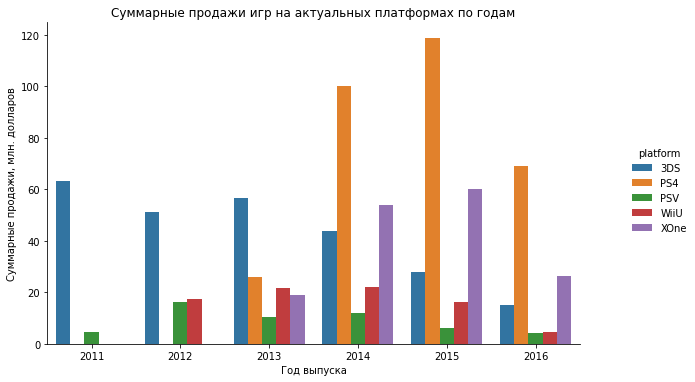

In [54]:
platform_dynamics = (games_actual
                              .loc[(games_actual['platform'].isin(("3DS", "PS4", "PSV", "WiiU", "XOne"))==True) & (
                                  games_actual['year_of_release'].isin((2011, 2012, 2013, 2014, 2015, 2016))==True)]
                              .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                              .reset_index()
                 )
plot = sns.catplot(x='year_of_release', y='total_sales', hue="platform", kind="bar", data=platform_dynamics)
plt.title("Суммарные продажи игр на актуальных платформах по годам", fontsize=12)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Суммарные продажи, млн. долларов', fontsize=10)
plot.fig.set_size_inches(10,5)

<b>Выводы</b> 

Судя по сводному барплоту, потенциальную прибыльность в 2017 году могут сохранить Playstation 4 и XBoxOne. Остальные платформы отражают затухающую динамику и вряд ли вступят в серьезную конкурентную борьбу, хотя могут продолжать приносить прибыль благодаря преданным поклонникам. При этом могут возникнуть новые игроки на рынке платформ, но пока эти данные в нашем исследовании отсутствуют.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Блок с информацией о данных за соответствующий актуальный период изучен превосходно, молодец!
</div>

### Потенциально прибыльные платформы

Оставим в срезе данных только игры, относящиеся к потенциально прибыльным платформам.

In [55]:
profit_platforms = pd.Series(platform_dynamics['platform'].unique())
games_popular = games_actual.loc[games_actual['platform'].isin(profit_platforms)==True].reset_index(drop=True)
games_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


### Глобальные продажи игр по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [56]:
# Сводная таблица для построения боксплотов по глобальным продаж игр
name_sale = games_popular.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum').reset_index()
name_sale.head()

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07


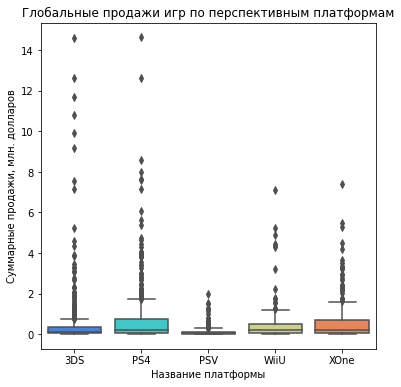

In [57]:
# Построим "ящик с усами" с разбивкой по платформам
fig = plt.subplots(figsize=(6,6))
plt.title("Глобальные продажи игр по перспективным платформам")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow')
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи, млн. долларов')
plt.show()

Практически по каждой из платформ есть большая доля игр, суммарные продажи по которым вылетают из квартильных значений.
Перестроим график в укрупнённом виде, исключив из визуализации выбивающиеся значения, чтобы изучить средние, медианные и квартильные значения.

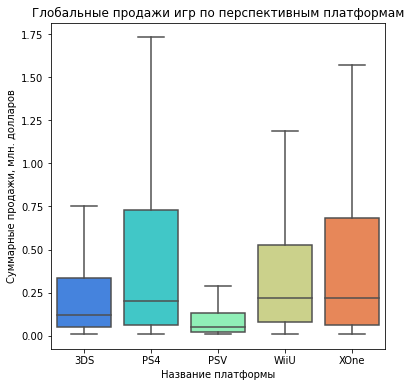

In [58]:
fig = plt.subplots(figsize=(6,6))
plt.title("Глобальные продажи игр по перспективным платформам")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow', showfliers=False)
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи, млн. долларов')
plt.show()

<b>Наблюдения:</b>
Для всех платформ среднее значение превышает медианное, при этом у лидеров рынка PS4 и XOne этот разлет наиболее заметен. Благодаря популярности и широкому ассортименту игр они могут позволить варьировать цены.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Отличный анализ потенциально прибыльных платформ и хорошие наблюдения!
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
К слову, я бы еще предложил написать пару слов про выбросы: что это такое и как можно охарактеризовать платформу. 
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> В данном случае самые массовые выбросы наблюдаются у самых популярных платформ. За счет большой выборки выбросы могут быть неотъемлемой частью распределения.
</div>

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v2:</b> 
    
Да, это вполне естественно, гуд 👍
</div>

### Влияние отзывов пользователей и критиков

Ограничим анализ ранее выбранными 5 популярными платформами. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

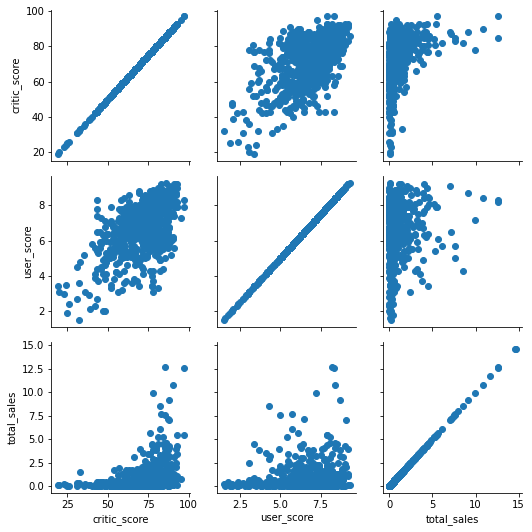

In [59]:
scatters_popular = sns.PairGrid(games_popular[['critic_score', 'user_score', 'total_sales']])
scatters_popular.map(plt.scatter)
plt.show()

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Альтернативный метод визуального построения зависимостей переменных ([подробнее](https://seaborn.pydata.org/generated/seaborn.pairplot.html)).
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Спасибо за рекомендацию. Обязательно попробую освоить более симпатичный вариант pairplot. Увы, сейчас в рабочем аврале и не могу сконцентрироваться на спокойном завершении сборного проекта с полным погружением. Стыдно, но обещаю доделать.
</div>

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v2:</b> 
    
Анна, все хорошо, не надо так переживать 😉
    
Я лишь предлагаю иные варианты, которые можно изучить в любое удобно для себя время.
</div>

In [60]:
corr_popular = games_popular.corr()
corr_popular

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.052932,-0.011418,-0.094422,0.005467,0.166812,0.065349,-0.049104
na_sales,-0.052932,1.000000,0.786582,0.423613,0.837115,0.354844,0.030025,0.927909
eu_sales,-0.011418,0.786582,1.000000,0.350603,0.933785,0.306978,-0.001244,0.918719
jp_sales,-0.094422,0.423613,0.350603,1.000000,0.255412,0.162344,0.188153,0.592232
other_sales,0.005467,0.837115,0.933785,0.255412,1.000000,0.332393,-0.001862,0.897123
critic_score,0.166812,0.354844,0.306978,0.162344,0.332393,1.000000,0.581636,0.351868
user_score,0.065349,0.030025,-0.001244,0.188153,-0.001862,0.581636,1.000000,0.048536
total_sales,-0.049104,0.927909,0.918719,0.592232,0.897123,0.351868,0.048536,1.000000


<b>Наблюдения:</b>
Коэффициент корреляции между оценкой критиков и общими продажами составляет 0.35. Для пользовательской оценки корреляция с объемом продаж и того меньше - всего 0.05. Это слабая зависимость - видимо, на общие продажи влияют иные факторы.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Верное замечание)
</div>

/tmp/ipykernel_53/844939604.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_popular, dtype=np.bool))


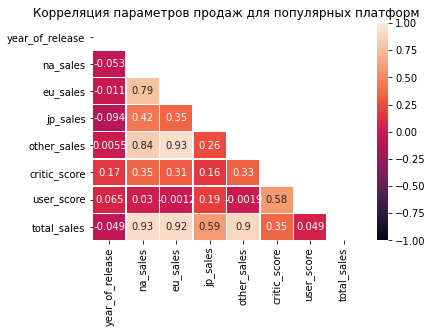

In [61]:
fig, ax = plt.subplots()
plt.title("Корреляция параметров продаж для популярных платформ")
mask = np.triu(np.ones_like(corr_popular, dtype=np.bool))
sns.heatmap(corr_popular, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax, annot=True)
plt.show()

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b> 
    
Анна, графики очень важно комментаривать, а не оставлять на размышления заказчику :)
    
Ты можешь просто переместить сюда замечание выше или написать что-то свое.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> 
Судя по тепловой карте, связь между оценками и продажами действительно слабая. Зато заметны региональные отличия: в Японии при покупках чуть более обращают внимание на оценку критиков, а в Северной Америке и Европе - на пользовательские оценки. Жаль, что зависимость такая слабая, чтобы нагляднее показать силу авторитета в Японии.</div>

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера v2:</b> 
    
Анна, боюсь, ты перепутала значения цветовой палитры, потому что выводы у тебя получились с точностью наоборот касательно того, в какой стране больше обращают внимание на оценку критиков/пользователей. 
    
Я добавил параметр `annot == True`, чтобы тебе было легче видеть, где корреляция сильнее, а где слабее. 
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
    <br>Да, уж перепутала так перепутала... Классная подсказка с аннотацией - спасибо, приму на заметку.

Теперь тепловая карта явно свидетельствует, что в Северной Америке и Европе оценкам критиков при покупке игр уделяют внимание по крайней мере в два раза чаще, чем в Японии. В Японии же более актуальны пользовательские оценки: если для Северной Америки и Европы их роль ничтожна, то в Японии их влияние даже выше значения оценок критиков.
</div>

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v3:</b> 
    
Превосходно! Теперь вывод полностью соответствует полученным расчетам!
</div>

---

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b> 
    
Также обрати внимание, пожалуйста, на задание: необходимо взять **одну** популярную консоль, провести для нее анализ, а потом сравнить ее с результатами по другим консолям. Причем, их нужно анализировать отдельно друг от друга, а не в одной таблице :(
    
Я уверен, для тебя это не составит труда, поэтому буду ждать твой ответ 🙂
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Попробую загладить невнимательность и проработать упущенный момент на примере платформы Playstation 4.</div>

In [62]:
# Корреляция между оценками пользователей и продажами платформы PS4
ps_four = games_popular[games_popular['platform']=='PS4']
ps_four['user_score'].corr(ps_four['total_sales'])

-0.031957110204556424

Text(0.5, 1.0, 'Диаграмма рассеяния для зависимости продаж от оценок пользователей')

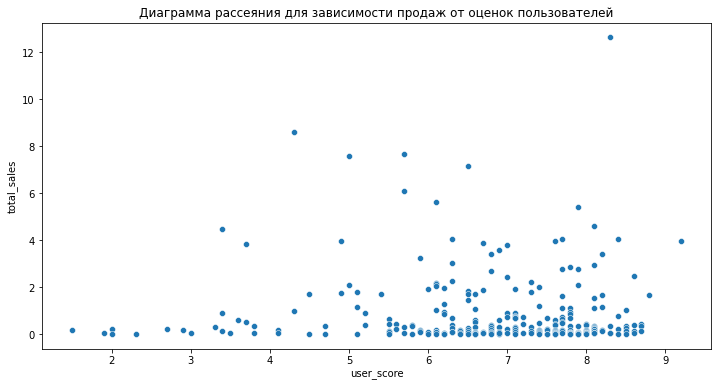

In [63]:
# Диаграмма рассеяния для зависимости продаж от оценок пользователей
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps_four)
plt.title('Диаграмма рассеяния для зависимости продаж от оценок пользователей')

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Видим отсутствие зависимости продаж игр на PS4 от оценок пользователей. </div>

In [64]:
# Корреляция между оценками критиков и продажами платформы PS4
ps_four = games_popular[games_popular['platform']=='PS4']
ps_four['critic_score'].corr(ps_four['total_sales'])

0.40656790206178095

Text(0.5, 1.0, 'Диаграмма рассеяния для зависимости продаж от оценок критиков')

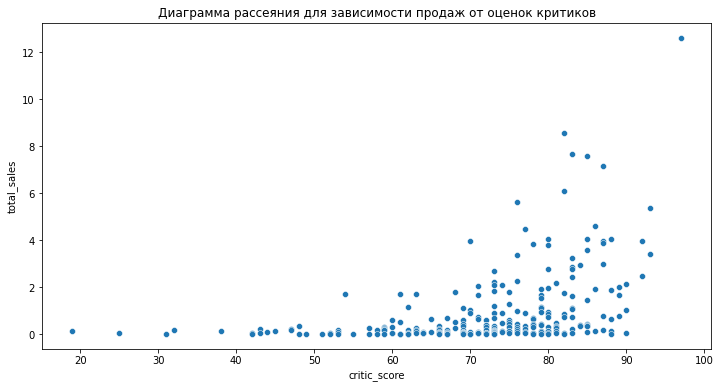

In [65]:
# Диаграмма рассеяния для зависимости продаж от оценок критиков
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps_four)
plt.title('Диаграмма рассеяния для зависимости продаж от оценок критиков')

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Видим умеренно слабую зависимость продаж игр на PS4 от оценок критиков. </div>

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v2:</b> 
    
Супер, теперь блок изучен верно!
</div>

### Продажи игр на других платформах

Сравним результаты с продажами игр на других, менее популярных платформах.

In [66]:
games_other = games_actual.loc[games_actual['platform'].isin(profit_platforms)!=True].reset_index(drop=True)

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

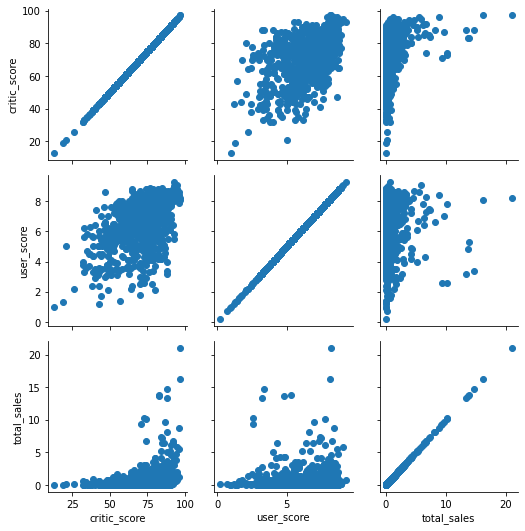

In [67]:
scatters_other = sns.PairGrid(games_other[['critic_score', 'user_score', 'total_sales']])
scatters_other.map(plt.scatter)
plt.show()

In [68]:
corr_other = games_other.corr()
corr_other

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.054726,-0.015880,-0.056351,-0.034785,0.094594,-0.162510,-0.044155
na_sales,-0.054726,1.000000,0.783662,0.158543,0.781376,0.290705,0.014414,0.936796
eu_sales,-0.015880,0.783662,1.000000,0.217943,0.956347,0.312272,0.008343,0.941303
jp_sales,-0.056351,0.158543,0.217943,1.000000,0.240999,0.116058,0.153093,0.294934
other_sales,-0.034785,0.781376,0.956347,0.240999,1.000000,0.290749,0.027287,0.931081
critic_score,0.094594,0.290705,0.312272,0.116058,0.290749,1.000000,0.508900,0.317220
user_score,-0.162510,0.014414,0.008343,0.153093,0.027287,0.508900,1.000000,0.024672
total_sales,-0.044155,0.936796,0.941303,0.294934,0.931081,0.317220,0.024672,1.000000


<b>Наблюдения:</b>
Для не самых популярных платформ также наблюдается отсутствие связи между оценками критиков/пользователей и продажами.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Окей, все верно!
</div>

/tmp/ipykernel_53/3538843099.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_other, dtype=np.bool))


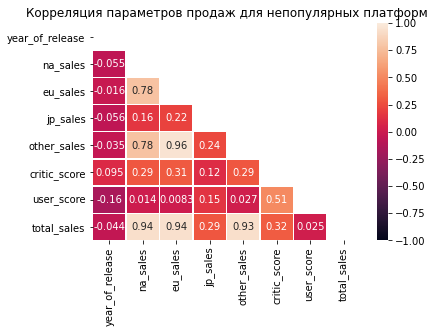

In [69]:
fig, ax = plt.subplots()
plt.title("Корреляция параметров продаж для непопулярных платформ")
mask = np.triu(np.ones_like(corr_other, dtype=np.bool))
sns.heatmap(corr_other, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax, annot=True)
plt.show()

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b> 
    
Аналогично тому, что я писал выше - график необходимо подкреплять словесным выводом)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> 
Судя по тепловой карте, на продажи непопулярных платформ бОльшее влияние оказывает пользовательская оценка, нежели рейтинг критиков. Причем в Японии таких продаж опять-таки больше - это по-прежнему уникальный рынок.</div>

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера v2:</b> 
    
Аналогично тепловой карте выше, попробуй подправить вывод, опираясь на значения корреляции, которые подписаны. 
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
    <br> 
Теперь тепловая карта явно свидетельствует, что на продажи непопулярных платформ более сильное влияние оказывают оценки критиков, особенно в Северной Америке и Европе. При этом в Японии по-прежнему преимущественно ориентируются на пользовательские оценки, в то время как в западных странах на рейтинг пользователей практически не обращается внимания.
</div>


<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v3:</b> 
    
Теперь и здесь вывод верный :)
</div>

### Распределение игр по жанрам

Построим "ящики с усами" для общих продаж игр с разбивкой по жанрам.

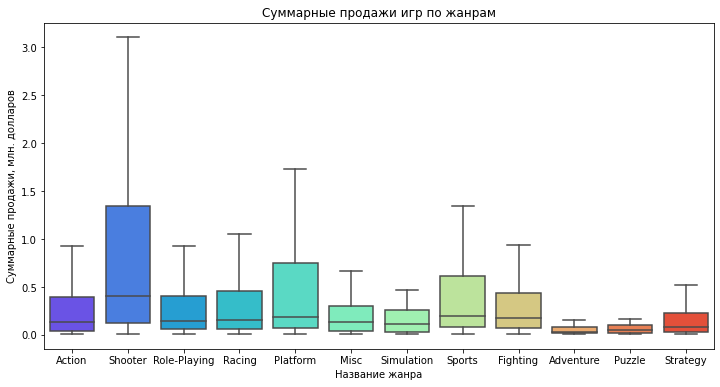

In [70]:
fig = plt.subplots(figsize=(12,6))
plt.title("Суммарные продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="total_sales", data=games_actual, palette='rainbow', showfliers=False)
plt.xlabel('Название жанра')
plt.ylabel('Суммарные продажи, млн. долларов')
plt.show()

In [71]:
# Сформируем сводную таблицу для выявления наиболее и наименее прибыльных жанров.
(games_actual
             .pivot_table(index='genre', values='total_sales', aggfunc='sum')
             .sort_values(by='total_sales', ascending=False)
             .reset_index()
)

,genre,total_sales
0,Action,557.80
1,Shooter,402.91
2,Role-Playing,245.63
3,Sports,237.15
4,Misc,139.42
5,Platform,88.68
6,Racing,88.36
7,Fighting,66.90
8,Simulation,50.26
9,Adventure,45.04


<b>Наблюдения</b>

Самыми прибыльными жанрами по объему продаж можно назвать экшн, спорт и шутеры.

При этом судя по боксплоту, самый доходный жанр - это именно шутеры. Средний и медианный уровни продаж этого жанра выше значений по другим жанрам. Кроме того, датасет в разрезе этого жанра сильно скошен вправо: много покупателей выбирают отдельные игры с высокой ценой - следовательно, это должно быть перспективным направлением продаж.

Стратегии принесли самый низкий доход, но судя по "ящику с усами", у этого жанра все не настолько плохо, как у Adventure и Puzzle. Даже у этого жанра еще может быть шанс к развитию продаж когда-нибудь.

Самым бесперспективным жанром в части продаж оказываются приключенческие игры (Adventure). Хоть этот игровой жанр и только на 3-м месте с хвоста по суммарным продажам, по распределению наибольшее число игр продавалось за низшую по сравнению с другими жанрами стоимость.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Отличные замечания, молодец!
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Если быть более точным: тут речь скорее не про прибыльность, а об успешности продажах тех или иных игр. Все-таки речь про млн копий. 
</div>

<b>ВЫВОДЫ</b>

На данном этапе исследования выявлена динамика смены популярных платформ. На протяжении десятилетия наблюдается активная эстафета популярности платформ: 
* 1994-2000: Playstation
* 2001-2005: Playstation2
* 2005-1010: DS
* 2006-2010: Wii
* 2008-2013: Playstation3
* 2008-2013: Xbox360

В целом примерный срок устаревания платформ составляет около 8-10 лет. С эволюцией игровой индустрии появляются все больше нишевых платформ для своей категории пользователей. По динамике рынка актуальным срезом для анализа данных выбран период с 2006 по 2016 год.

По анализу продаж сделан прогноз, что потенциально прибыльными в 2017 году могут быть платформы: 
* 3DS может потенциально приносить прибыль до появления аналогов нового поколения
* Playstation4 набирает обороты и приносит самый высокий доход от продаж
* PlaystationVita не самая популярная, но потенциально прибыльная в ближайшие пару лет 
* WiiU как преемница Wii с потенциальной популярностью по крайней мере в ближайшие пару лет
* XBoxOne как потенциальный конкурент Playstation4

Анализ корреляции между оценкой игры и совокупными продажами показывает слишком слабую связь. Возможные причины:
* оценка пользователей носит субъективный характер (как позитивный, так и негативный), оставляется уже после покупки игры
* оценка критиков может быть подвержена фокусу на более (потенциально) популярные игры и не может физически охватывать весь диапазон игр

По всей видимости на продажи игр влияют некие иные факторы.

Анализ продаж показывает популярность следующих жанров:
* экшн - за счет продажи нескольких дорогих игр жанра
* спорт - также несколько лидеров жанра составляют ядро продаж
* шутеры - самый прибыльный жанр: средний и медианный показатели превышают значения других жанров

Самые низкодоходные жанры:
* стратегии
* паззлы
* приключения - самый неперспективный и по совокупным продажам и по низкой цене игр жанра

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Анна, вывод превосходный: содержит все необходимые результаты расчетов, а также общие комментарии по каждому блоку. 
</div>

## Портрет пользователя каждого региона

### Топ-5 популярных платформ для пользователя региона (NA, EU, JP)

#### Популярные платформы в Северной Америке

In [72]:
# Сводная таблица по размерам продаж платформ в Северной Америке
na_popular_games = (games_actual
                                .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_popular_games['na_ratio'] = round(na_popular_games['na_sales'] / sum(na_popular_games['na_sales']), 3)

# Выборка самых популярных платформ в Севверной Америке для сравнения по регионам
na_superpopular = na_popular_games.head()
na_superpopular

,platform,na_sales,na_ratio
0,X360,226.80,0.273
1,PS3,168.26,0.203
2,PS4,108.74,0.131
3,XOne,93.12,0.112
4,3DS,82.65,0.100


В Северной Америке самыми популярными платформами за отчетный период стали XBox, Wii, Playstation 3, DS и Playstation 2.

In [73]:
# Продажи в Северной Америке по ранее выделенным перспективным платформам
na_perspective = na_popular_games.loc[na_popular_games['platform'].isin(profit_platforms)==True]
na_perspective

,platform,na_sales,na_ratio
2,PS4,108.74,0.131
3,XOne,93.12,0.112
4,3DS,82.65,0.100
6,WiiU,38.10,0.046
9,PSV,12.47,0.015


Доли продаж потенциально перспективных платформ для Северной Америки пока ничтожны.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Супер, здесь все правильно!
</div>

#### Популярные платформы в Европе

In [74]:
# Сводная таблица по размерам продаж платформ в Европе
eu_popular_games = (games_actual
                                .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_popular_games['eu_ratio'] = round(eu_popular_games['eu_sales'] / sum(eu_popular_games['eu_sales']), 3)

# Выборка самых популярных платформ в Европе для сравнения по регионам
eu_superpopular = eu_popular_games.head()
eu_superpopular

,platform,eu_sales,eu_ratio
0,PS3,163.10,0.243
1,PS4,141.09,0.211
2,X360,117.14,0.175
3,3DS,61.27,0.091
4,PC,56.70,0.085


В Европе наиболее популярными платформами стали Playstation3, XBox360, Wii, DS и Playstation4.

In [75]:
# Продажи в Европе по ранее выделенным перспективным платформам
eu_perspective = eu_popular_games.loc[eu_popular_games['platform'].isin(profit_platforms)==True]
eu_perspective

,platform,eu_sales,eu_ratio
1,PS4,141.09,0.211
3,3DS,61.27,0.091
5,XOne,51.59,0.077
7,WiiU,25.13,0.038
8,PSV,13.07,0.020


<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Тут тоже все гуд 👍
</div>

#### Популярные платформы в Японии

In [76]:
# Сводная таблица по размерам продаж платформ в Японии
jp_popular_games = (games_actual
                                .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_popular_games['jp_ratio'] = round(jp_popular_games['jp_sales'] / sum(jp_popular_games['jp_sales']), 3)

# Выборка самых популярных платформ в Японии для сравнения по регионам
jp_superpopular = jp_popular_games.head()
jp_superpopular

,platform,jp_sales,jp_ratio
0,3DS,100.62,0.410
1,PS3,49.39,0.201
2,PSP,24.04,0.098
3,PSV,21.84,0.089
4,PS4,15.96,0.065


В Японии пятерка самых популярных платформ: DS, 3DS, Playstation3, PlaystationPortable, Wii.

In [77]:
# # Продажи в Японии по ранее выделенным перспективным платформам
jp_perspective = jp_popular_games.loc[jp_popular_games['platform'].isin(profit_platforms)==True]
jp_perspective

,platform,jp_sales,jp_ratio
0,3DS,100.62,0.410
3,PSV,21.84,0.089
4,PS4,15.96,0.065
5,WiiU,13.01,0.053
9,XOne,0.34,0.001


Игры на  XBoxOne в Японии практически не продаются, а возможно и вообще эта платформа не представлена на японском рынке.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Да, все верно. 
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Как рекомендация, я бы мог посоветовать представлять `ratio` все-таки в %, так как долю все же понятнее представлять именно в таком виде 😉
    
Хотя это на вкус и цвет)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> 
Хорошо, учту и не буду злоупотреблять такими штуками.</div>

#### Сравнение популярных платформ по регионам

In [78]:
# Сведем данные по долям продаж популярных платформ в регионах в единую таблицу
superpopular = na_superpopular.merge(eu_superpopular, on=['platform'], how='outer')
superpopular = superpopular.merge(jp_superpopular, on=['platform'], how='outer')
superpopular.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
superpopular.sort_values(by='platform').reset_index(drop=True)

,platform,na_ratio,eu_ratio,jp_ratio
0,3DS,0.100,0.091,0.410
1,PC,NaN,0.085,NaN
2,PS3,0.203,0.243,0.201
3,PS4,0.131,0.211,0.065
4,PSP,NaN,NaN,0.098
5,PSV,NaN,NaN,0.089
6,X360,0.273,0.175,NaN
7,XOne,0.112,NaN,NaN


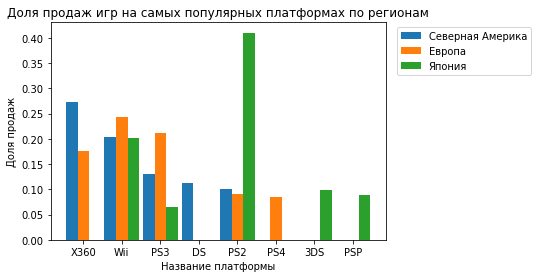

In [79]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр на самых популярных платформах по регионам',
       xlabel='Название платформы', ylabel='Доля продаж')
x1 = np.arange(1,9) - 0.3
x2 = np.arange(1,9)
x3 = np.arange(1,9) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['X360', 'Wii', 'PS3', 'DS', 'PS2', 'PS4', '3DS', 'PSP'])
ax.bar(x1, superpopular['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, superpopular['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, superpopular['jp_ratio'], width=0.3, label='Япония')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

<b>Наблюдения</b>

Платформа XBox360 наиболее популярна в Северной Америке (почти 25% рынка продаж), в Европе достаточно популярна (доля рынка около 18%), в Японии же практически не продается в рассматриваемый период.

Платформа Playstation3 активно популярна в Европе (доля продаж 23%), достаточно популярна в Северной Америке (17% рынка) и Японии (14% рынка).

Платформа DS очень популярна в Японии (26% локального рынка), не так популярна в Северной Америке (14% объема продаж) и Европе (доля продаж 10%). 

Платформа Wii довольно популярна в Северной Америке (21% продаж), Европе (18% рынка) и в Японии (13% локального объема продаж).

Некоторые платформы популярны исключительно в отдельных регионах: Playstation4 в Европе, Playstation2 в Северной Америке, PlaystationPortable в Японии.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Отличная и наглядная демонстрация данных!
</div>

In [80]:
# Выведем в единую таблицу доли продаж по потенциально прибыльным платформам в регионах
perspectives = na_perspective.merge(eu_perspective, on=['platform'], how='outer')
perspectives = perspectives.merge(jp_perspective, on=['platform'], how='outer')
perspectives.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
perspectives.sort_values(by='platform').reset_index(drop=True)

,platform,na_ratio,eu_ratio,jp_ratio
0,3DS,0.100,0.091,0.410
1,PS4,0.131,0.211,0.065
2,PSV,0.015,0.020,0.089
3,WiiU,0.046,0.038,0.053
4,XOne,0.112,0.077,0.001


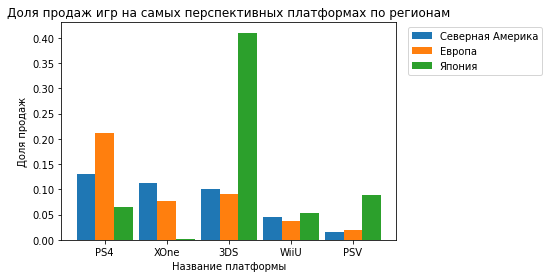

In [115]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр на самых перспективных платформах по регионам',
       xlabel='Название платформы', ylabel='Доля продаж')
x1 = np.arange(1,6) - 0.3
x2 = np.arange(1,6)
x3 = np.arange(1,6) + 0.3
plt.xticks([1, 2, 3, 4, 5], ['PS4', 'XOne', '3DS', 'WiiU', 'PSV'])
ax.bar(x1, perspectives['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, perspectives['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, perspectives['jp_ratio'], width=0.3, label='Япония')
ax.grid=False
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

<b>Наблюдения</b>

По перспективным платформам в регионах на 2017 год можно выстроить следующие предположения: 
* в Северной Америке и Европе наиболее популярна Playstation4 (4% от продаж и 8% от продаж соответственно)
* в Японии гиперпопулярной является 3DS (18%), в других регионах ее положение можно назвать в разряде перспективных (3% в Северной Америке и 4% в Европе)
* XBoxOne популярна и в Северной Америке, и в Европе, однако практически не представлена в Японии.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Молодец! Блок проанализирован верно, комментарии даны правильные 👍
</div>

### Топ-5 популярных жанров для пользователя региона (NA, EU, JP)

#### Популярные жанры в Северной Америке

In [82]:
na_pop_genres = (games_actual
                                .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_pop_genres['na_ratio'] = round(na_pop_genres['na_sales'] / sum(na_pop_genres['na_sales']), 3)
na_super_genres = na_pop_genres.head()
na_super_genres

,genre,na_sales,na_ratio
0,Action,230.92,0.278
1,Shooter,194.43,0.234
2,Sports,108.70,0.131
3,Role-Playing,83.78,0.101
4,Misc,69.69,0.084


#### Популярные жанры в Европе

In [83]:
eu_pop_genres = (games_actual
                                .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_pop_genres['eu_ratio'] = round(eu_pop_genres['eu_sales'] / sum(eu_pop_genres['eu_sales']), 3)
eu_super_genres = eu_pop_genres.head()
eu_super_genres

,genre,eu_sales,eu_ratio
0,Action,199.12,0.297
1,Shooter,148.02,0.221
2,Sports,88.48,0.132
3,Role-Playing,62.30,0.093
4,Racing,40.62,0.061


#### Популярные жанры в Японии

In [84]:
jp_pop_genres = (games_actual
                                .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_pop_genres['jp_ratio'] = round(jp_pop_genres['jp_sales'] / sum(jp_pop_genres['jp_sales']), 3)
jp_super_genres = jp_pop_genres.head()
jp_super_genres

,genre,jp_sales,jp_ratio
0,Role-Playing,79.87,0.325
1,Action,63.62,0.259
2,Misc,17.60,0.072
3,Fighting,12.38,0.050
4,Platform,12.13,0.049


#### Сравнение популярных жанров по регионам

In [85]:
super_genres = na_super_genres.merge(eu_super_genres, on=['genre'], how='outer')
super_genres = super_genres.merge(jp_super_genres, on=['genre'], how='outer')
super_genres.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
super_genres.sort_values(by='genre').reset_index(drop=True)

,genre,na_ratio,eu_ratio,jp_ratio
0,Action,0.278,0.297,0.259
1,Fighting,NaN,NaN,0.050
2,Misc,0.084,NaN,0.072
3,Platform,NaN,NaN,0.049
4,Racing,NaN,0.061,NaN
5,Role-Playing,0.101,0.093,0.325
6,Shooter,0.234,0.221,NaN
7,Sports,0.131,0.132,NaN


In [106]:
super_genres['na_ratio']

0    0.278
1    0.234
2    0.131
3    0.101
4    0.084
5      NaN
6      NaN
7      NaN
Name: na_ratio, dtype: float64

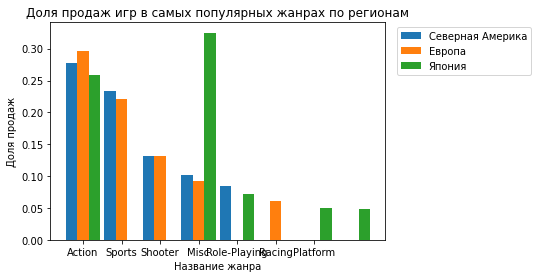

In [120]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр в самых популярных жанрах по регионам',
      xlabel='Название жанра', ylabel='Доля продаж')
x1 = np.arange(1,9) - 0.3
x2 = np.arange(1,9)
x3 = np.arange(1,9) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing', 'Racing', 'Platform'])
ax.bar(x1, super_genres['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, super_genres['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, super_genres['jp_ratio'], width=0.3, label='Япония')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

<b>Наблюдения</b>

Экшн равнозначно популярен во всех трех регионах. Бросается в глаза гиперпопулярность ролевого жанра в Японии, при этом шутеры, так популярные в Европе и Северной Америке, совсем здесь не представлены.

Обращает на себя внимание категория "Прочее" (Misc), довольно ровно популярная во всех регионах за счет разнообразия жанрового контента для любой аудитории. И локальная популярность гоночного жанра в Европе и жанра "Platform" для Японии.

Различия в предпочтениях разных регионов могут быть связаны не только с представленностью платформ, но и с культурными различиями в разных частях света. Западная культура Европы и Северной Америки все-таки сближает их предпочтения по жанрам и довольно сильно отличает от восточной уникальности Японии.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Все просто великолепно: расчеты верные, выводы полные и содержательные.
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера v2:</b> 
    
Анна, а почему ты решила закомментировать график?
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
    <br> 
К сожалению, после дополнительных манипуляций отображение графика сломалось, и я по малодушию его скрыла, не зная, как починить исходное отображение. Знаю, что так нельзя, но сдалась раньше времени.
</div>


<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера v3:</b> 
    
Анна, я разобрался, почему возникала ошибка при выводе графика: по оси Х находится 8 категорий, а когда ты создаешь `np.arange(1,8)` (как было до этого), цифр в массиве будет 7 (от 1 до 7). Поэтому необходимо продлить границу до 9, как это сделал я. 
    
Теперь график выводится хорошо :)
</div>

### Влияние рейтинга ESRB на продажи в отдельном регионе

Классификация рейтинга для справки:

* «EC» («Early childhood») — «Для детей младшего возраста»: игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.
* «E» («Everyone») — «Для всех»: содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
* «T» («Teen») — «Подросткам»: игра подходит для лиц от 13 лет.
* «M» («Mature») — «Для взрослых»: материалы игры не подходят для подростков младше 17 лет.
* «AO» («Adults Only 18+») — «Только для взрослых»: содержание игры только для взрослых старше 18 лет.
* «RP» («Rating Pending») — «Рейтинг ожидается»: продукт был отправлен в ESRB и ожидает присвоения рейтинга.

#### Влияние рейтинга ESRB на продажи в Северной Америке

In [87]:
na_rating_sales = (games_actual
                                .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_rating_sales['na_ratio'] = round(na_rating_sales['na_sales'] / sum(na_rating_sales['na_sales']), 3)
na_rating_sales

,rating,na_sales,na_ratio
0,M,308.45,0.437
1,E,170.17,0.241
2,E10+,117.72,0.167
3,T,109.31,0.155
4,EC,0.42,0.001
5,RP,0.00,0.000


Самые продаваемые игры в Северной Америке по рейтингу ESRB:
* E - для всех: 38%
* М - для взрослых: 27%
* Т - для подростков: 20%
* E10+ - от 10 лет и старше: 15%
* EC - для детей младшего возраста: 0.1% (почти не продаются)

#### Влияние рейтинга ESRB на продажи в Европе

In [88]:
eu_rating_sales = (games_actual
                                .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_rating_sales['eu_ratio'] = round(eu_rating_sales['eu_sales'] / sum(eu_rating_sales['eu_sales']), 3)
eu_rating_sales

,rating,eu_sales,eu_ratio
0,M,250.26,0.452
1,E,141.73,0.256
2,T,83.16,0.150
3,E10+,78.00,0.141
4,RP,0.03,0.000
5,EC,0.00,0.000


Самые продаваемые игры в Европе по рейтингу ESRB:
* E - для всех: 36%
* М - для взрослых: 31%
* Т - для подростков: 19%
* E10+ - от 10 лет и старше: 14%
* EC - для детей младшего возраста: 0%

#### Влияние рейтинга ESRB на продажи в Японии

In [89]:
jp_rating_sales = (games_actual
                                .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_rating_sales['jp_ratio'] = round(jp_rating_sales['jp_sales'] / sum(jp_rating_sales['jp_sales']), 3)
jp_rating_sales

,rating,jp_sales,jp_ratio
0,E,36.68,0.341
1,T,33.39,0.311
2,M,26.14,0.243
3,E10+,11.23,0.105
4,EC,0.00,0.000
5,RP,0.00,0.000


Самые продаваемые игры в Японии по рейтингу ESRB:
* E - для всех: 42%
* М - для взрослых: 15%
* Т - для подростков: 30%
* E10+ - от 10 лет и старше: 13%
* EC - для детей младшего возраста: 0%

В Японии большая доля продаж у игр для подростков, чем для игр для взрослых (в отличие от Северной Америки и Европы). При этом игры для детей младшего возраста не представлены ни в одном регионе.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Влияние рейтингов проанализировано полностью правильно!
</div>

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b> 
    
Анна, боюсь ты не рассмотрела игры с пропущенными рейтингами. Их надо тоже добавить в таблицу и прокомментировать разницу. 
    
Для этого пропуски необходимо заменить на какое-нибудь маркерное значение 😉
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> 
    Эх, и правда мое упущение. Попробую что-то придумать, но страшно, что все посыпется вдребезги.</div>

In [90]:
region_rating_sales = na_rating_sales.merge(eu_rating_sales, on=['rating'], how='outer')
region_rating_sales = region_rating_sales.merge(jp_rating_sales, on=['rating'], how='outer')
region_rating_sales.drop(['na_ratio', 'eu_ratio', 'jp_ratio'], axis='columns', inplace=True)
region_rating_sales.sort_values(by='rating').reset_index(drop=True)

,rating,na_sales,eu_sales,jp_sales
0,E,170.17,141.73,36.68
1,E10+,117.72,78.00,11.23
2,EC,0.42,0.00,0.00
3,M,308.45,250.26,26.14
4,RP,0.00,0.03,0.00
5,T,109.31,83.16,33.39


<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>Попробую заменить пропуски в рейтинге ESRB пометкой tbd
</div>

In [91]:
region_rating_sales['rating'] = region_rating_sales['rating'].fillna('tbd')
region_rating_sales

,rating,na_sales,eu_sales,jp_sales
0,M,308.45,250.26,26.14
1,E,170.17,141.73,36.68
2,E10+,117.72,78.00,11.23
3,T,109.31,83.16,33.39
4,EC,0.42,0.00,0.00
5,RP,0.00,0.03,0.00


<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> При учете игр с пропущенным рейтингом продажи в западном регионе возглавили игры для взрослых, затем игры для всех, для детей старше 10 лет и подростков. В Европе практически та же картина, но игры для подростков продаются лучше игр для детей старше 10 лет. В Японии остается та же картина: игры для всех в топе, затем для подростков и взрослых.
</div>

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера v2:</b> 
    
Да, супер, теперь все верно)
</div>

<b>ВЫВОДЫ</b>

<b>Популярность</b>
В Северной Америке наиболее популярны игры на платформе XBox360, эта платформа также популярна в Европе, но совсем не представлена в Японии. В Европе самыми популярными являются игры на Playstation3, которая также популярна в Северной Америке и в Японии. В Японии наиболее продаваемыми являются игры на платформе DS, которая при этом менее популярна в Северной Америке и Европе. Во всех регионах довольно популярны игры на платформе Wii. Также есть платформы, завоевавшие популярность на отдельных рынках: Playstation2 в Северной Америке, Playstation4 в Европе, 3DS и PlaystationPortable в Японии.

<b>Перспективы</b>
По перспективным платформам в регионах на 2017 год можно выстроить следующие предположения: 
* в Северной Америке и Европе наиболее популярна Playstation4 (4% от продаж и 8% от продаж соответственно)
* в Японии гиперпопулярной является 3DS (18%), в других регионах ее положение можно назвать в разряде перспективных (3% в Северной Америке и 4% в Европе)
* XBoxOne популярна и в Северной Америке, и в Европе, однако практически не представлена в Японии.

<b>Жанры</b>
Экшн равнозначно популярен во всех трех регионах. Бросается в глаза гиперпопулярность ролевого жанра в Японии, при этом шутеры, так популярные в Европе и Северной Америке, совсем здесь не представлены. Обращает на себя внимание категория "Прочее" (Misc), довольно ровно популярная во всех регионах за счет разнообразия жанрового контента для любой аудитории. И локальная популярность гоночного жанра в Европе и жанра "Platform" для Японии. Различия в предпочтениях разных регионов могут быть связаны не только с представленностью платформ, но и с культурными различиями в разных частях света. Западная культура Европы и Северной Америки все-таки сближает их предпочтения по жанрам и довольно сильно отличает от восточной уникальности Японии.

<b>Рейтинг ESRB</b>
В Северной Америке и Европе схожая структура продаж по рейтингу игр: игры для всех, для взрослых и для подростков в топе. В Японии предпочтения отличаются: подростковые игры более популярны, чем игры для взрослых. На игры для детей младшего возраста нет спроса ни в одном регионе.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Точно так же, как и выше, блок изучен абсолютно верно, молодец!
</div>

<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b> 
    
Разве что, я мог бы порекомендовать растягивать график там, где названия не умещаются по дефолту 😉
</div>

## Проверка гипотез

В этом разделе проверим следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC

Проанализируем две генеральные совокупности: рейтинг пользователей игр на платформе XBoxOne (xboxone_games) и PC (pc_games).

In [92]:
xboxone_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['platform'] == "XOne")]
pc_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['platform'] == "PC")]

Прежде чем формулировать или проверять статистические гипотезы, удостоверимся, что сравниваемые наборы имеют нормальное распределение.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


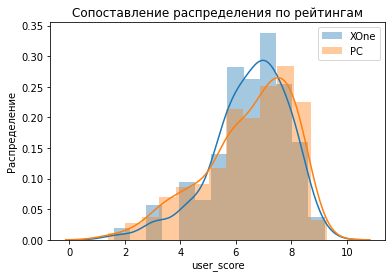

In [93]:
fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('Распределение')
plt.title('Сопоставление распределения по рейтингам')
sns.distplot(xboxone_games['user_score'], label='XOne')
sns.distplot(pc_games['user_score'], label='PC')
plt.legend()
plt.show()

Данные распределены нормально, хоть и с отрицательной скошенностью набора данных.

Нулевая гипотеза <b>H0</b>: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза <b>H1</b>: Средние двух генеральных совокупностей не равны между собой.

Несмотря на то, что xboxone_games и pc_games - это не совсем генеральные совокупности, а скорее выборки, согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Введём уровень значимости, определяющий близость к среднему значению: 5%.

Выборки являются независимыми. Дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению.

In [94]:
# Проверим гипотезы через распределение t-Стьюдента
sample_1 = xboxone_games['user_score']
sample_2 = pc_games['user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу.


<b>Результат</b>: p-значение оказалось меньше уровня значимости в 5%. Соответственно, мы отвергли нулевую гипотезу и приняли альтернативную гипотезу, что средние двух генеральных совокупностей не равны между собой.

<b>Вывод</b>: средние пользовательские рейтинги платформ Xbox One и PC различаются.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Первая гипотеза сформулирована и проверена правильно!
</div>

### Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports

Проанализируем две генеральные совокупности: рейтинг пользователей игр в жанре Action (action_games) и Sports (sports_games).

In [95]:
action_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['genre'] == "Action")]
sports_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['genre'] == "Sports")]

Проверим, чтобы сравниваемые наборы имели нормальное распределение.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


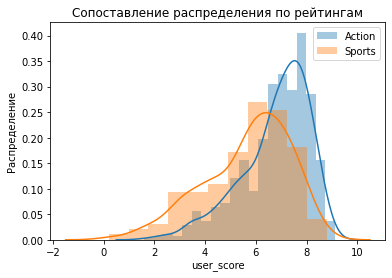

In [96]:
fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('Распределение')
plt.title('Сопоставление распределения по рейтингам')
sns.distplot(action_games['user_score'], label='Action')
sns.distplot(sports_games['user_score'], label='Sports')
plt.legend()
plt.show()

Наборы данных скошены влево, при этом имеют нормальное распределение.

Нулевая гипотеза  <b>H0</b>: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза <b>H1</b>: Средние двух генераальных совокупностей не равны между собой.

Несмотря на то, что action_games и sports_games - это не совсем генеральные совокупности, а скорее выборки, согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Введём уровень значимости, определяющий близость к среднему значению: 5%.

Выборки являются независимыми. Дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению.

In [97]:
# Проверим гипотезы через распределение t-Стьюдента.
sample_1 = action_games['user_score']
sample_2 = sports_games['user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу.


<b>Результат</b>: p-значение оказалось меньше уровня значимости в 5%. Соответственно, мы отвергли нулевую гипотезу и приняли альтернативную гипотезу, что средние двух генеральных совокупностей не равны между собой.

<b>Вывод</b>: Cредние пользовательские рейтинги жанров Action и Sports различаются.

Итак, были проведены t-тесты проверки двусторонних гипотез для двух независимых выборок. В результате было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC различаются, как и средние пользовательские рейтинги жанров Action и Sports.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Вторая гипотеза так же сформулирована и проверена верно 👍
</div>

## Общий вывод

Для интернет-магазина «Стримчик» проведено исследование рынка компьютерных игр в разных регионах мира за период с 1994 по 2016 год с целью выявления перспектив на 2017 год. 

После предобработки данных (восстановления пропущенных значений и исключения выбросов) исследовательский анализ показал динамику смены популярности платформ в регионах Северной Америки, Европы и Японии. Примерный срок, за который устаревает платформа, составляет около 8-10 лет.

На основе анализа продаж можно сделать прогноз, что потенциально прибыльными в 2017 году могут быть платформы: 
* 3DS, которая уже несколько лет популярна у пользователей
* Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж
* PlaystationVita не самая популярная, но потенциально успешная в ближайшие 2-3 года 
* WiiU как преемница популярной в свое время Wii
* XBoxOne как потенциальный конкурент Playstation4. 

Также выявлено отсутствие сильной или явной связи между оценкой игры и совокупными продажами, то есть можно сделать вывод, что на продажи игр влияют некие иные факторы.

Анализ продаж по жанрам показывает прибыльность жанра экшн - за счет продаж отдельных особо успешных и дорогих игр. На втором месте по доходности за анализируемый актуальный период находится спортивный жанр, для него также характерна похожая ситуация. Следущим по прибыльности стал жанр шутеров. Это оказался в среднем самым доходным сегментом игр: средний и медианный уровни продаж этого жанра выше значений по любому другому жанру, а значит, это перспективное направление для продажи. Самыми низкоприбыльными оказались жанры стратегии, паззлов и приключений, причем последний явно не подает надежды на успешность.

Составлен портрет пользователя в каждом регионе. По перспективным для 2017 года платформам по регионам наблюдается следующее:
* в Северной Америке и Европе наиболее популярна Playstation4 
* в Японии самой популярной является 3DS, которая в других регионах занимет второе место из перспективных 
* в Северной Америке и Европе также популярна платформа XBoxOne, однако игры на которой не продаются в Японии.

В западных регионах Северной Америки и Европы наблюдаются различия от Японии в предпочтении игровых жанров. Например, популярные на западе шутеры совсем не пользуются интересом в Японии. При этом в Японии очень популярны ролевые игры, совсем не представленные на Западе. Такие же различия заметны по рейтингу игр ESRB: в Японии, в отличие от Северной Америки и Европы, более популярны подростковые игры, нежели игры для взрослых.

В заключение анализа были проверены две гипотезы. По t-тестам было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC различаются, а также средние пользовательские рейтинги жанров Action и Sports различаются.

<b>СПРАВКА ДЛЯ ИНТЕРНЕТ-МАГАЗИНА "СТРИМЧИК"</b>

* При планировании продаж не базироваться на оценки пользователей и критиков
* Иметь в виду, что срок устаревания платформы в среднем составляет 8-10 лет, то есть следует полагаться на молодые платформы возрастом до 6 лет
* Следует учитывать региональные предпочтения по платформам и жанрам: на Западе основной фокус платформам Playstation4 и XBoxOne с акцентом на жанрах экшн и шутер, в Японии ориентироваться на платформу 3DS с опорой на ролевой жанр игр
* По рейтингу ESRB стоит придерживаться консервативного подхода при выпуске игр: E - для всех, M - для взрослых, T - для подростков. Стоит изучить демографические показатели, чтобы рассмотреть возможность развития игр для детей старшего и младшего возраста, которые пока не сильно представлены (не пользуются спросом).

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> 
    
Вывод написан потрясающе! Содержит:
    
* Все необходимые результаты анализов
* Полные и подробные комментари
* Рекомендации на будущее
    
Так держать 👍
</div>

<div class="alert alert-success">
    <b>Общий вывод:</b> 
    
Анна, поздравляю, ты справилась с большим и весьма непростым исследованием, молодец! Мне безумно понравилось проверять твой проект: 

* Хороший код
* Умение структурировать информации
* Твои выводы, все четко и по делу
* Классные визуализации
    
Ознакомься с моими комментариями и рекомендациями, чтобы мы могли вместе обсудить твои вопросы) 
    
Если их не будет, то я с большой радостью приму твой проект в следующей итерации! 🙂

Успехов!
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Миша, спасибо за стремительное и такое деликатное, заботливое ревью. Очень неловко все делать впопыхах, неосмысленно, но у меня такие нарастающие отставания по всем личным, рабочим и учебным делам, что хоть что-то хочется сгоряча доделать. Готова на правки, паузу на осмысление, но надеюсь совсем не отстать от когорты и хоть что-то доделать в разумном режиме. Наитеплейшие приветы и большое спасибо за помощь и поддержку.
</div>

<div class="alert alert-success">
    <b>Общий вывод v2:</b> 
    
Анна, большое спасибо за ценную обратную связь. Я вижу твое большое стремление к работе, поэтому очень хочу, чтобы мы смогли вместе разобраться в этом проекте и двигаться дальше!
    
Ознакомься с моими новыми комментариями с пометкой **v2**. Я уверен, что для тебя не составит труда подредактировать свой код, чтобы получить верный ответ) 
    
Также хочу напомнить, что ты можешь спросить меня о чем угодно, ведь моя задача помочь тебе стать лучшим аналитиком данных!
    
Если вопросов не будет, то я уверен, что твой проект будет готов к следующей проверке, и ты сможешь двигаться дальше! 🙂

С пожеланием успехов, Миша!
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
    <br> 
Миша, спасибо за поддержку и подсказки. Неловко за эмоциональный фон моей предыдущей ревизии: в очередной раз потеряла душевный покой и хладнокровие для здравого, поступательного решения вопросов. Надеюсь сохранять благоразумие и спокойствие на пути к цели.
</div>

<div class="alert alert-success">
    <b>Общий вывод v3:</b> 
    
Анна, не вижу смысла так переживать :) 
    
Яндекс.Практикум тем и отличается, что у тебя нет никакой спешки - если ты понимаешь, что тебе требуется больше времени для изучения материала, то ты всегда можешь сделать "паузу" и посвятить столько времени разбору материала, сколько тебе необходимо. Здесь не ставят плохие оценки, потому что наша главная задача помочь студентам самостоятельно разобраться в теме и как видишь, у тебя прекрасно получилось исправить свою работу!
    
Я считаю, что твоя работа теперь выполнена чудесно и готова к тому, чтобы ты могла двигаться дальше! 
    
Ознакомься пожалуйста с моими дополнениями с комментарием **v3**, там есть пара полезных советов :)

Анна, все будет хорошо, ты обязательно справишься и успешно закончишь начатое дело, ведь оно того стоит! Успехов, Миша!
</div>